We invetigate about the globules in M1-67 and we find some papers for [M1-67 and WR 124](https://github.com/will-henney/globule-seminario/issues/19#issuecomment-1517063395).
In our discussion we take some values for the wind velocity $v_\inf$,  mass-loss rate $\dot{M}$, distance $d$, ionizing luminosity $L_*$.
We [obtain](https://github.com/will-henney/globule-seminario/issues/20) the angular size of the globules (radius).
We found that en this case the electronic density are between $n_e\approx500 cm^{-3}$ at the exterior and $n_e\approx 2000cm^{-3}$ and we compare this with an stimate similarly to LDN 1616

In [1]:
# for Packages
import numpy as np
from IPython.display import display, Markdown #this is for the text in our code
from astropy.coordinates import SkyCoord #import astropy 
import astropy.units as u #import the units
from astropy.coordinates import SkyCoord #coordinates from astropy
from astropy import constants as const #constants

In [2]:
import matplotlib.pyplot as plt

rc_fonts = {
        "text.usetex": True,
        "font.size": 30,
        'mathtext.default': 'regular',
        'axes.titlesize': 33,
        "axes.labelsize": 33,
        "legend.fontsize": 30,
        "xtick.labelsize": 30,
        "ytick.labelsize": 30,
        'figure.titlesize': 33,
        'figure.figsize': (13,11),
        'text.latex.preamble': [r'\usepackage{amsmath,amssymb,bm,physics,lmodern}'],
        "font.family": "serif",
        "font.serif": "computer modern roman",
        }

plt.rcParams.update(rc_fonts)

/home/roberto/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [3]:
#Parameters
#decir de donde se sacaron los parametros
D = 5429*u.pc                      # conversation with Jane
v_inf = 710*u.km*(1/u.second)      # Hanmman
M_loss = (2.0E-5)*u.M_sun*(1/u.yr) #Crowther 1999
L = 10**(49.1)*(1/u.second)        # Hanmman

In [4]:
L

<Quantity 1.25892541e+49 1 / s>

For the radius globule we use the definition of $pc$ and we have that $0.1 arcsec \times D[pc]=r[UA]$, where $D$ is in $pc$ and $r$ in $UA$.
_scipy dont have UA so we convert to pc directly_

In [5]:
r = 542.9*(4.8481E-6)*u.pc  #globule radius in pc

For an stimate similar to LDN 1616 considering the wind velocity and ionizing flux we have
$$n_0=\frac{-u_0+\sqrt{u_0^2+4h\alpha_\beta F_0}}{2h\alpha_\beta}$$

# Estimate the density with VEM
 
 We want to knowteh density using the defnition of VEM and the luminosity.
 
 The density depends of parameters that we can observed.

For the luminosity we have $$L=\int_{4\pi}d\Omega\int_V j_\nu dV$$ and for $H_\alpha$ we have
$$L(H\alpha)=\int_{4\pi}d\Omega\int_V j dV=4\pi\int_V jdV$$ with $j$ our source therefore
$$L(H\alpha)= \int_V  \alpha_\beta n_e n_p(h\nu)_{H\alpha}f_{H \alpha} dV$$ where $f_{H\alpha}$ is a efficient factor, and because $\alpha_\beta,(h\nu)_{H\alpha},f_{H\alpha}$ are constant and assuming that $n_e=n_p$ and using the definition for VEM we have
$$L(H\alpha)=4\pi\alpha_\beta(h\nu)_{H\alpha}f_{H\alpha}VEM$$ on the other hand for the flux we have $L=4\pi r^2F$ so we have
$$4\pi D^2F(H\alpha)=\alpha_\beta(h\nu)_{H\alpha}f_{H\alpha}VEM$$
$$\Rightarrow VEM=\frac{4\pi D^2F(H\alpha)}{\alpha_\beta(h\nu)_{H\alpha}f_{H\alpha}}$$

Now for VEM we use the result that we obtain 
$$VEM=\pi\xi_0n_0^2r_0^3$$
$$\Rightarrow n_0=\sqrt{\frac{VEM}{\pi\xi_0 r_0^3}}$$

In [6]:
F_Ha = 3.0E-14*(u.erg/(u.cm**2*u.second))
E = (6.61E-27*2.99E10)/(6.563E-5)*(u.erg)
alpha_Halpha = 2.20E-13*(u.cm**3/u.second)    # with T=6 000K
VEM = (4*np.pi*(D.to('cm'))**2*F_Ha)/(alpha_Halpha*E)
VEM

<Quantity 1.59690459e+56 1 / cm3>

In [7]:
r = (542.9*u.AU) #globule radius 
xi = 0.2291820650049779 #this values is obtain in calculatios for h_0,...
n_0 = ((VEM)/(np.pi*xi*(r.to('cm'))**3))**(1/2)
n_0

<Quantity 20347.27960482 1 / cm3>

We have a density similarly to Grosdidier $\approx 5739 cm^{-3}$, Now we want the ioniziong flux that we need

In [8]:
alpha_beta = 2.3E-13 * u.cm**3 / (u.second)
h = 0.1*r
F0 = n_0**2*alpha_beta*(h.to('cm'))+n_0*v_inf
F0

<Quantity 1.52199358e+12 1 / (cm2 s)>

Now we calculated the distance to which are localizated

In [9]:
L_lyman = 10**(49.1)*(1/u.second)
distance = (L/(4*np.pi*F0))**(1/2)
distance

<Quantity 8.11313416e+17 cm>

In [10]:
distance.to('pc')

<Quantity 0.26292877 pc>

$0.5 pc$ is the distance, and we considerer that globules are between 10" and 30".

In [11]:
distance1 = 10*5429*u.AU
distance1.to('pc')

<Quantity 0.26320535 pc>

In [12]:
distance2 = 30*5429*u.AU
distance2.to('pc')

<Quantity 0.78961604 pc>

The distance that we obtain is in the range of 10" and 30", $0.26 pc$ and $0.78pc$.

# Comparate the Pressure of wind and the globule

Now we calculated the pressure of the wind with the parameters of some papers, _we check waht papers considerer the conditions that are convenient for us_, and we have

In [13]:
# for distance 1
P = (M_loss*v_inf)/(4*np.pi*(distance1.to('cm'))**2)
P

<Quantity 1.71312074e-39 km solMass / (cm2 s yr)>

In [14]:
P = ((M_loss).cgs*(v_inf).cgs)/(4*np.pi*(distance1.to('cm'))**2)
P #in cgs

<Quantity 1.07941865e-08 g / (cm s2)>

For the velocity sound we calculated with a Temperature at 6000 K

In [15]:
T = 6000*u.K
m = (0.6*u.M_p).to('g')
c_s=((const.k_B).to('erg/K')*T/m)**(1/2)
c_s.to('km/second')

<Quantity 9.08537273 km / s>

Now we calculated the pressure of the globule

In [16]:
P_g = 2*n_0*m*c_s**2
P_g

<Quantity 3.37109415e-08 erg / cm3>

Finally we obtain a ratio of

In [17]:
(P).cgs/(P_g).cgs #in the same system

<Quantity 0.32019831>

In [18]:
# for distance 2
P2 = (M_loss*v_inf)/(4*np.pi*(distance2.to('cm'))**2)
(P2).cgs

<Quantity 1.19935405e-09 P / s>

In [19]:
(P2).cgs/(P_g).cgs

<Quantity 0.03557759>

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


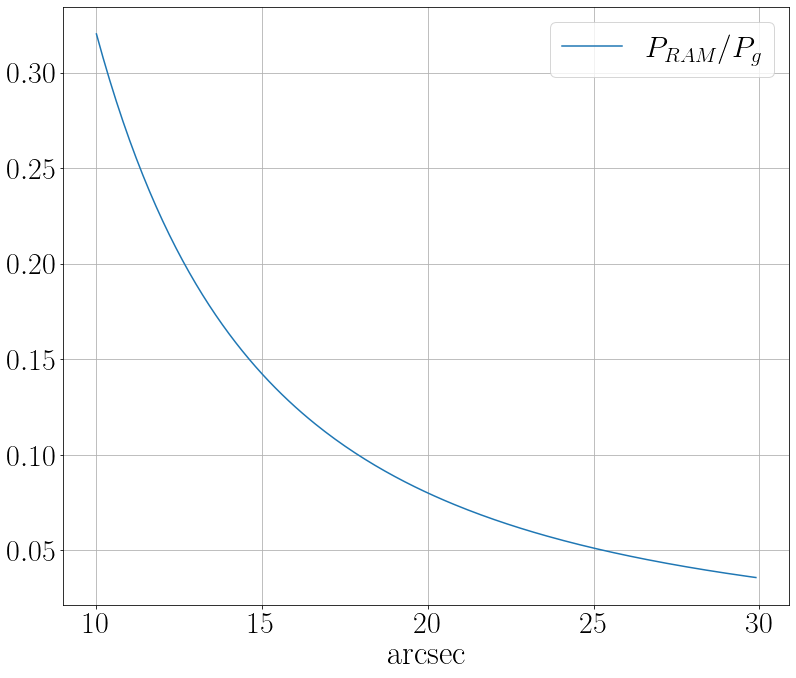

In [20]:
rang = np.arange(10,30,0.1) #the range in what we see the globules
distances = rang*5429*u.AU #rang are in arcsec, so we need to convert to distance en AU and later in cm
P_r = (M_loss*v_inf)/(4*np.pi*(distances.to('cm'))**2)
Pr_P = (P_r).cgs/(P_g).cgs

plt.plot(rang,Pr_P,label=r'$P_{RAM}/P_g$')
plt.xlabel('arcsec')
plt.grid()
plt.legend()
plt.show()

# Data for the globules that we observe

In [21]:
from astropy.table import QTable

tab = QTable.read("/home/roberto/globule-seminario/m1-67/m1-67-globule-parameters.ecsv")
#tab = QTable.read("../m1-67/m1-67-globule-parameters.ecsv") the ... the direction in our server
df = tab.to_pandas()

In [22]:
df

,PA,Sep,Bcore,Bshell,Bbg,Rcore,Rshell,Hshell,Group,Lat
0,296.281536,2.984163,0.315384,0.254769,0.494154,0.054657,NaN,0.140865,null,71.281536
1,66.852776,3.155305,NaN,NaN,0.728026,NaN,1.097835,NaN,"""NE-04""",21.852776
2,30.919261,3.310825,1.171778,0.408419,0.913299,0.138252,0.453276,0.155584,"""NE-04""",14.080739
3,71.974379,3.523556,0.538592,NaN,0.542482,0.102971,NaN,NaN,"""NE-04""",26.974379
4,16.829908,3.803228,0.644903,NaN,0.819601,0.090352,NaN,NaN,"""NE-04""",28.170092
...,...,...,...,...,...,...,...,...,...,...
164,156.449653,32.850701,0.276684,0.118413,0.094555,0.167154,0.605998,0.416320,"""S-33""",68.550347
165,157.043369,33.096804,0.123377,0.174499,0.135181,0.102036,0.101609,0.557308,"""S-33""",67.956631
166,155.777517,33.608446,0.283296,0.079442,0.192088,0.160548,0.758748,0.221632,"""S-33""",69.222483
167,163.513534,33.665709,0.144208,0.198356,0.080671,0.077778,0.302595,0.388896,"""S-33""",61.486466


To calculate $\ell$ we have 
$$\ell = 2(rh)^{1/2}$$
where $r$ is $Rshell$ and $h$ is $Hshell$, in the data they are in arcsec, so we multiply by $D$, so $[\ell]=AU$ and finally we convert to $pc$

In [23]:
l = 2*(df['Rshell']*df['Hshell'])**(1/2)*D*4.84814e-6 #factor to converto to cm
l #in cm

0           NaN
1           NaN
2      0.013979
3           NaN
4           NaN
         ...   
164    0.026441
165    0.012527
166    0.021587
167    0.018058
168         NaN
Length: 169, dtype: float64

In [24]:
df['Rshell']*D*1.496e+13

0               NaN
1      8.916376e+16
2      3.681409e+16
3               NaN
4               NaN
           ...     
164    4.921788e+16
165    8.252445e+15
166    6.162385e+16
167    2.457614e+16
168             NaN
Name: Rshell, Length: 169, dtype: float64

In [25]:
df['Rshell']*D*4.84814e-6

0           NaN
1      0.028896
2      0.011930
3           NaN
4           NaN
         ...   
164    0.015950
165    0.002674
166    0.019971
167    0.007964
168         NaN
Name: Rshell, Length: 169, dtype: float64

For $EM$ we have
$$\frac{B}{cgs}=(h\nu)_{H\alpha}0.0137$$
_Mejor cambiar la forma para confundir_
_Mejor convertir a I y despues a B_
and for the intensity
$$\frac{I}{cgs}=\frac{1.17\times10^{-13}3.086\times10^{18}}{4\pi}EM$$
$$\Rightarrow EM=\Big(\frac{I}{B}\Big)\frac{4\pi 0.0137(h\nu)_{\alpha}}{3.61\times10^5}$$

In [26]:
EM = (df['Bshell'])*(0.0137*4*np.pi)/(3.61E5*E)
EM

0      40345.854671
1               NaN
2      64678.338947
3               NaN
4               NaN
           ...     
164    18752.235109
165    27634.196047
166    12580.705268
167    31412.204330
168             NaN
Name: Bshell, Length: 169, dtype: float64

Now for the density we have
$$EM=\ell n^2\Rightarrow n=\sqrt{\frac{EM}{\ell}}$$

In [27]:
n_shell = (EM/(l))**(1/2)
n_shell

0              NaN
1              NaN
2      2150.974615
3              NaN
4              NaN
          ...     
164     842.149833
165    1485.266010
166     763.409140
167    1318.903118
168            NaN
Length: 169, dtype: float64

In [28]:
P_shell = 2*n_shell*m*c_s**2
P_shell

0               NaN
1               NaN
2      3.563689e-09
3               NaN
4               NaN
           ...     
164    1.395256e-09
165    2.460757e-09
166    1.264800e-09
167    2.185131e-09
168             NaN
Length: 169, dtype: float64

In [29]:
radius = df['Sep']*D*1.496e+13
P_RAM = ((M_loss).cgs*(v_inf).cgs)/(4*np.pi*radius**2)
P_RAM

0      1.212084e-07
1      1.084163e-07
2      9.847026e-08
3      8.693909e-08
4      7.462303e-08
           ...     
164    1.000203e-09
165    9.853838e-10
166    9.556100e-10
167    9.523619e-10
168    8.762995e-10
Name: Sep, Length: 169, dtype: float64

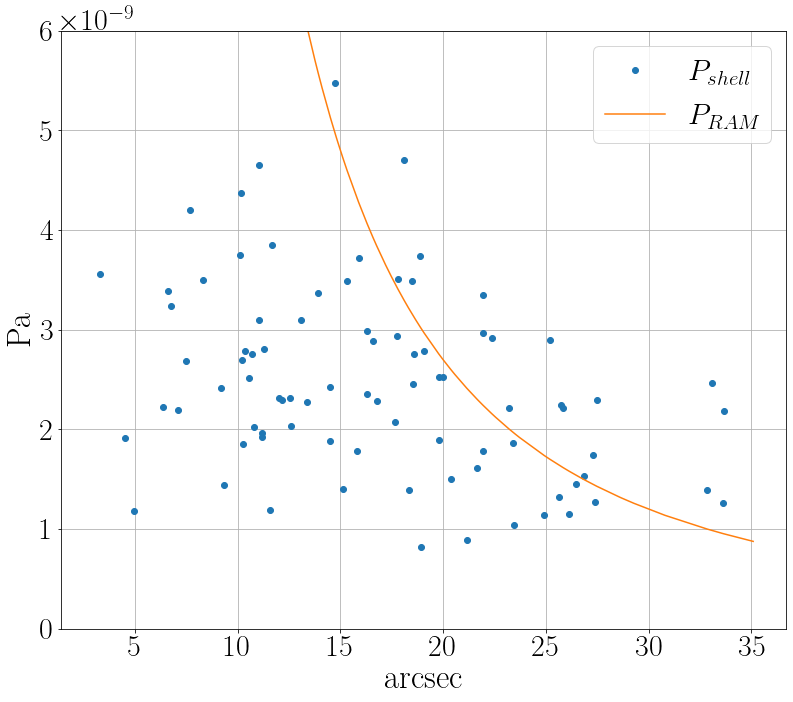

In [30]:
plt.plot(df['Sep'],P_shell,'o',label = r'$P_{shell}$')
plt.plot(df['Sep'],P_RAM,label=r'$P_{RAM}$')
plt.legend()
#plt.yscale('log')
plt.ylim(0,6.0E-9)
plt.xlabel('arcsec')
plt.ylabel('Pa')
plt.grid()
plt.show()

In [31]:
r.to('cm')

<Quantity 8.1216684e+15 cm>

## Presure RAM with differents angles

Now we plot the $P_{RAM}$ at differents angles $i$, we take $i=30°,45°,60°$. This is because some points in the last plot are below of $O_{RAM}$ and maybe we see only a projected radius, and the globules too.

If we considered this, our pressure by the wind is $P_{RAM}(R,i)=P_{RAM}(R_{obs}/\cos(i),i=0)\times \cos^{1/2}(i)$. ($R_{obs}=R\cos(i)$)

and we have 
$$P_{RAM}=\frac{\dot{M}v_\infty}{4\pi (R/\cos(i))^2}\cos^{1/2}(i)=\cos^{5/2}(i)\frac{\dot{M}v_\infty}{4\pi R^2}$$

In [32]:
i = np.arange(30,80,5) #degrees
i

array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])

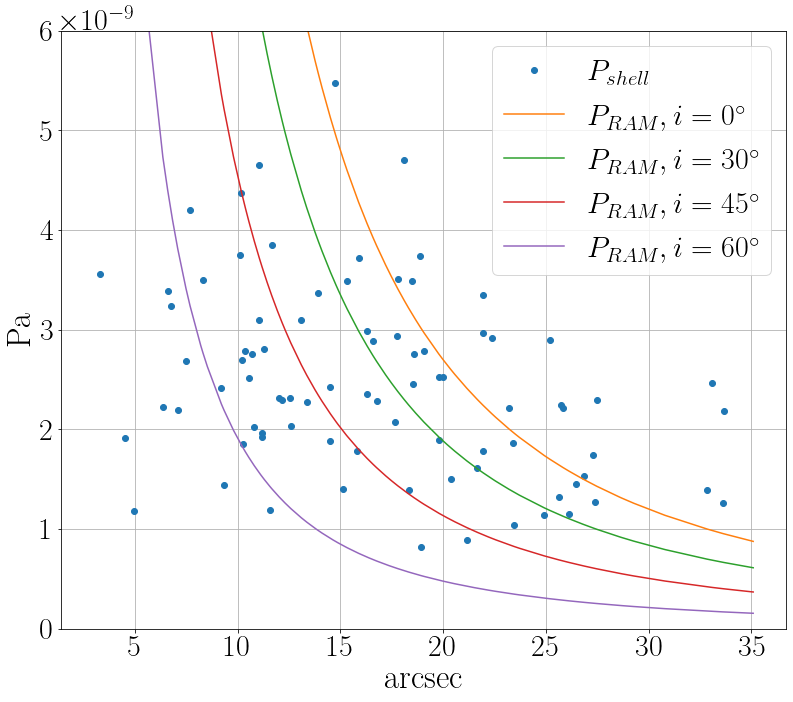

In [33]:
P_wind= []
for j in i:
    P_w = ((np.cos(j*np.pi/180))**(5/2))*P_RAM #we convert degrees to radians
    P_wind.append(P_w)
    

plt.plot(df['Sep'],P_shell,'o',label = r'$P_{shell}$')
plt.plot(df['Sep'],P_RAM,label=r'$P_{RAM}, i=0^\circ$')
plt.plot(df['Sep'],P_wind[0],label=r'$P_{RAM},i=30^\circ$')
#plt.plot(df['Sep'],P_wind[1],'--')#label=r'$P_{RAM},i=35$')
#plt.plot(df['Sep'],P_wind[2],'--')#label=r'$P_{RAM},i=40$')
plt.plot(df['Sep'],P_wind[3],label=r'$P_{RAM},i=45^\circ$')
#plt.plot(df['Sep'],P_wind[4],'--')#label=r'$P_{RAM},i=50$')
#plt.plot(df['Sep'],P_wind[5],'--')#label=r'$P_{RAM},i=55$')
plt.plot(df['Sep'],P_wind[6],label=r'$P_{RAM},i=60^\circ$')
#plt.plot(df['Sep'],P_wind[7],'--')#label=r'$P_{RAM},i=65$')
#plt.plot(df['Sep'],P_wind[8],'--')#label=r'$P_{RAM},i=70$')
#plt.plot(df['Sep'],P_wind[9],label=r'$P_{RAM},i=75^\circ$')
plt.legend()
#plt.yscale('log')
plt.ylim(0,6.0E-9)
plt.xlabel('arcsec')
plt.ylabel('Pa')
plt.grid()
plt.show()

In [34]:
1/np.cos(i*np.pi/180)

array([1.15470054, 1.22077459, 1.30540729, 1.41421356, 1.55572383,
       1.7434468 , 2.        , 2.36620158, 2.9238044 , 3.86370331])

For the differents angles $i$ we have that R is from 1.15 to 3.86 bigger than we observe, this is for $30°$ and $75°$ respectively.

# angles for globules

For the rati that we use for the $P_{RAM}$, now we want to know at waht angles should they be.

_When we plot both pressures we see some points out of the range that we expect, so we only considerer the globules that have angles between 0 and 1_

This is the angle that they shoud be

In [35]:
cos_i = ((4*np.pi*radius**2)/((M_loss).cgs*(v_inf).cgs)*P_shell)**(2/5)
cos_i

0           NaN
1           NaN
2      0.265117
3           NaN
4           NaN
         ...   
164    1.142421
165    1.442067
166    1.118656
167    1.394024
168         NaN
Length: 169, dtype: float64

here we make a histogram of the angles, really of $\cos i$, but the globules that have $\cos i>1$ makes a strange histogram for that we want.

(array([ 3.,  7., 10., 16., 10., 14., 11.,  9.,  2.,  2.]),
 array([0.23480794, 0.35553382, 0.47625969, 0.59698556, 0.71771143,
        0.8384373 , 0.95916317, 1.07988904, 1.20061492, 1.32134079,
        1.44206666]),
 <BarContainer object of 10 artists>)

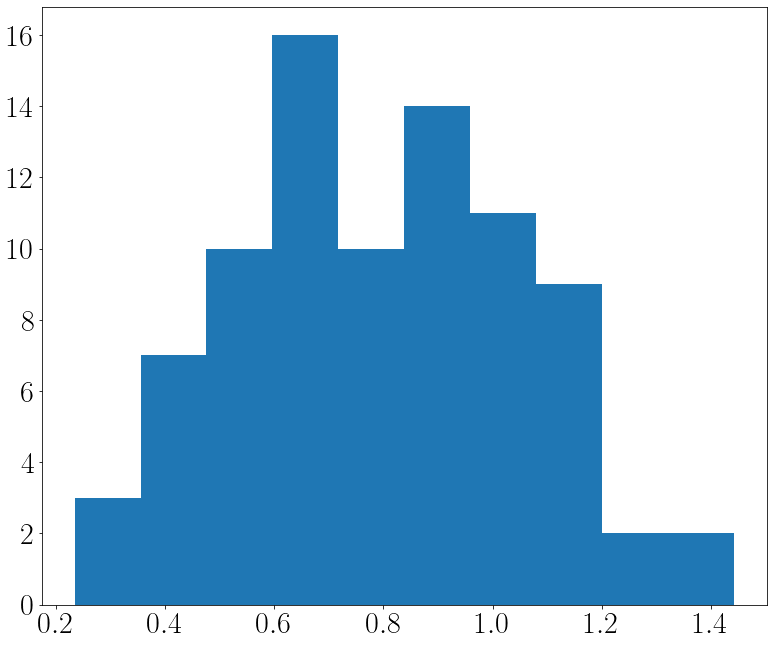

In [36]:
plt.hist(cos_i) #Para un histograma simple

Here we only ocnsiderer the globules with $\cos i\leq 1$ and we make ahistogram again 

In [37]:
cos_i[cos_i>1.0] = np.nan #hace NAN los que cumplen la condicion
#similarmente se puede usar
#cos_i = np.where(cos_i>1.0,np.nan,cos_i)
#(condicional,lo que queremos sustituir si se ssumple la condicion, cosa si no se cumple la condicion)

In [38]:
cos_i

0           NaN
1           NaN
2      0.265117
3           NaN
4           NaN
         ...   
164         NaN
165         NaN
166         NaN
167         NaN
168         NaN
Length: 169, dtype: float64

(array([ 3.,  1.,  5.,  3.,  9., 12.,  6.,  7.,  7., 12.]),
 array([0.23480794, 0.30927626, 0.38374457, 0.45821289, 0.53268121,
        0.60714952, 0.68161784, 0.75608615, 0.83055447, 0.90502278,
        0.9794911 ]),
 <BarContainer object of 10 artists>)

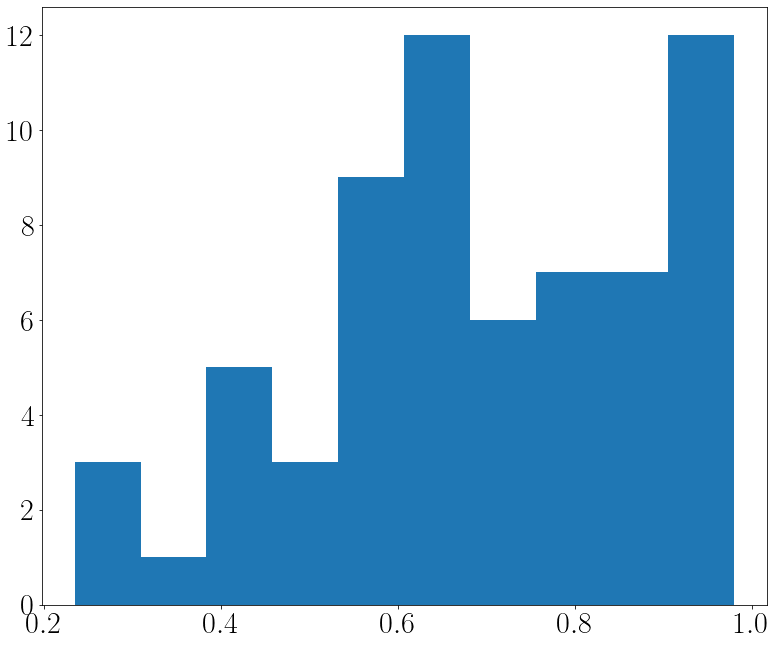

In [39]:
plt.hist(cos_i)

In this Histogram we note a difference with the other, we can take a uniform distribution for some ranges.

# Distribution or radius

We want what isi the distribution of the radius, in our histogram of projected radius we see a binomial distribution but now we want to konw the distributon considering the angles that we find previously 

In [40]:
Radius_real = radius/cos_i
Radius_real

0               NaN
1               NaN
2      1.014261e+18
3               NaN
4               NaN
           ...     
164             NaN
165             NaN
166             NaN
167             NaN
168             NaN
Length: 169, dtype: float64

Text(0.5, 1.0, 'Histogram of globules')

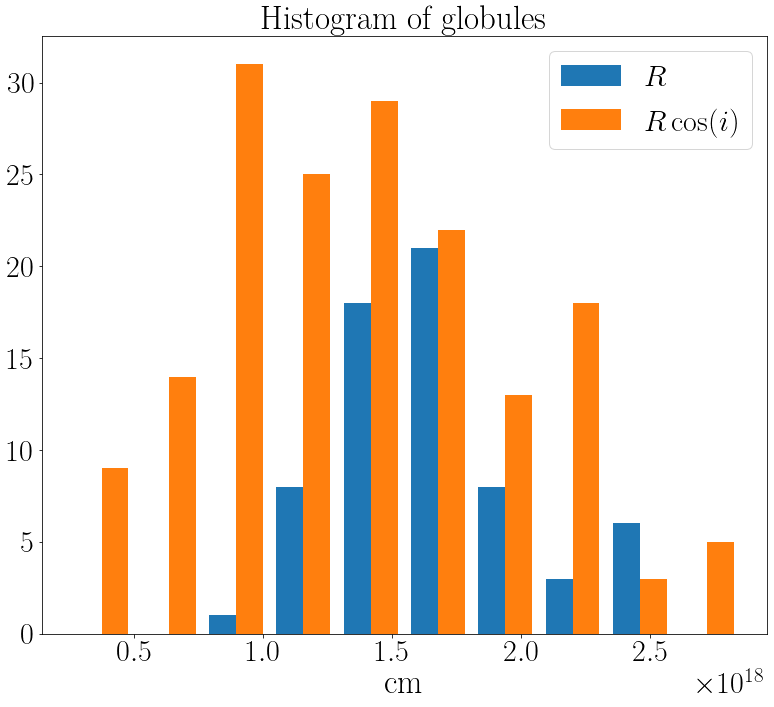

In [41]:
plt.hist((Radius_real,radius),label=('$R$',r'$R\cos(i)$'))
plt.legend()
plt.xlabel('cm')
plt.title('Histogram of globules')

In this plot, we can see that the real radius has a different distribution than the projected. We can see that near of the WR star there are few globules and later the nunmber of globules increases and again far of the WR star decreases.

# Searching some correlations 

We try to find some correlation in teh parameters, so we plot and make histograms for diferents parameters to try to find some correlations or some that could helps us

(array([ 0.,  4., 13., 14.,  8., 12.,  3.,  4.,  8.,  2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

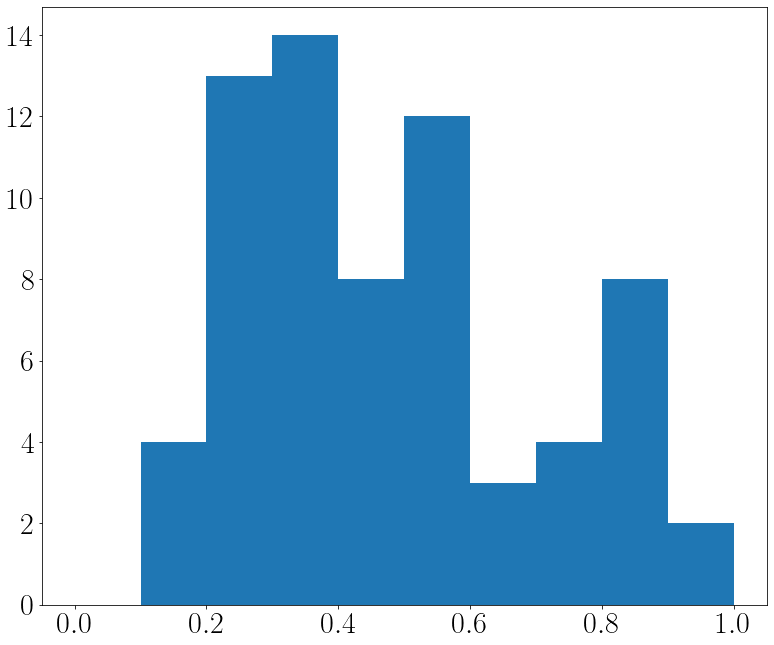

In [42]:
ratio_HshellR = (df['Hshell'])/(df['Rshell'])
plt.hist(ratio_HshellR,range=(0.0,1.0))

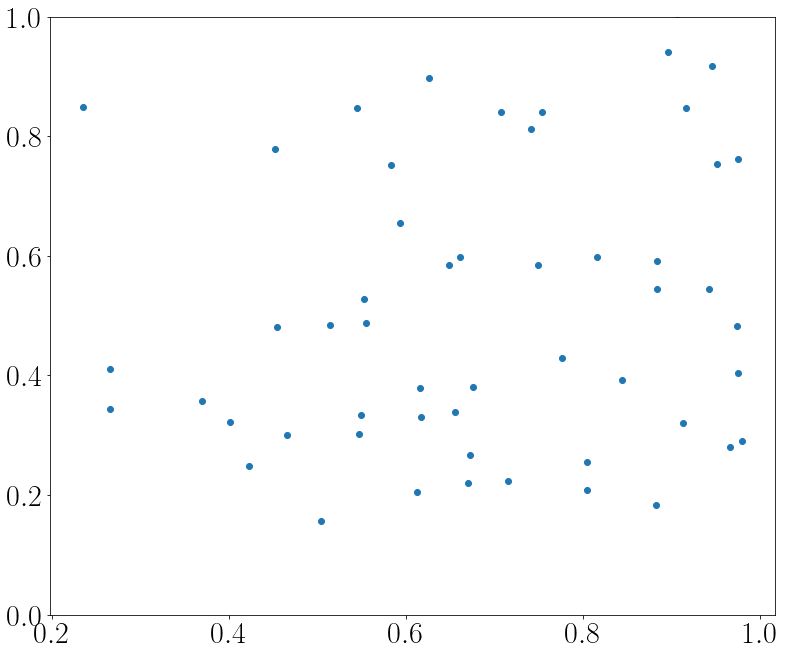

In [43]:
plt.plot(cos_i,ratio_HshellR,'o')
plt.ylim(0,1)
plt.show()

There are not a obvious correlations between radius and angle

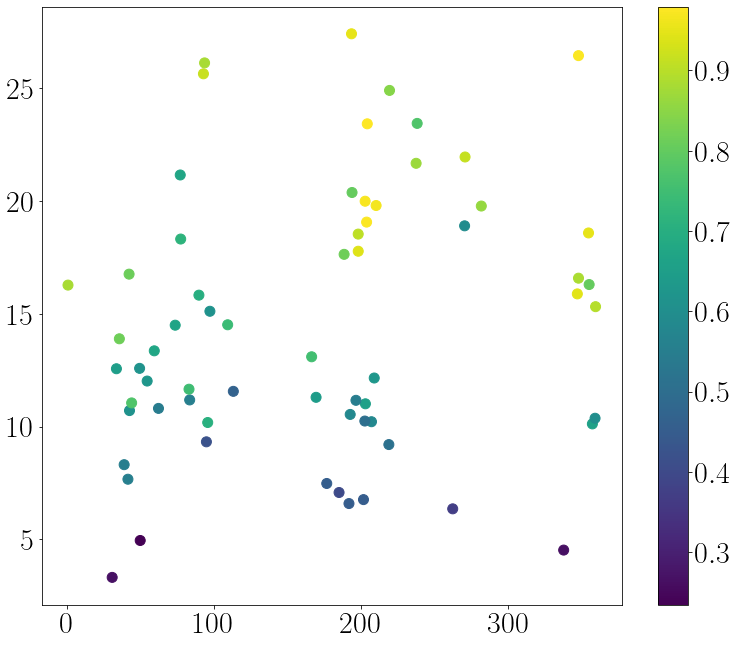

In [44]:
g = plt.scatter(df['PA'],df['Sep'],c=cos_i,s=100)
plt.colorbar(g)
plt.show()

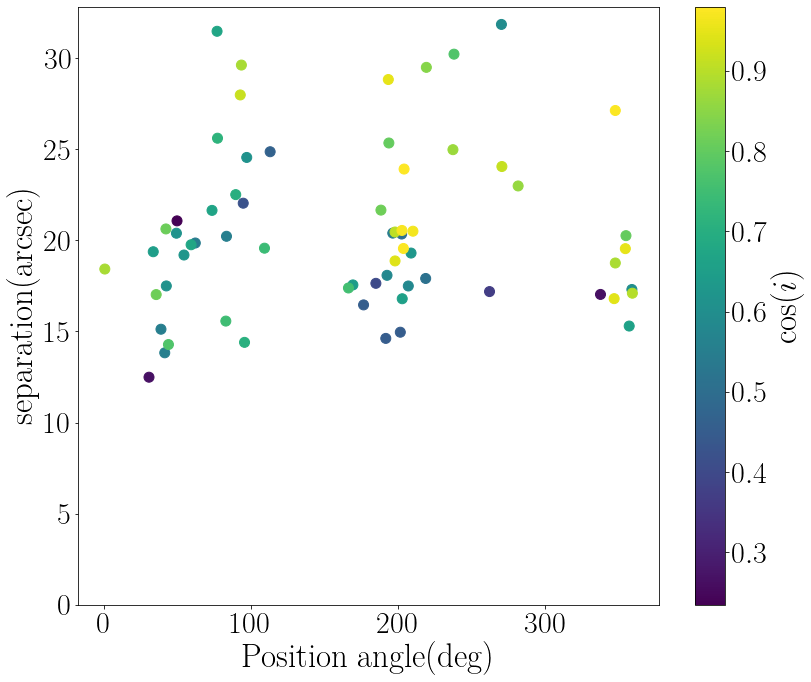

In [45]:
g = plt.scatter(df['PA'],df['Sep']/cos_i,c=cos_i,s=100)
plt.xlabel('Position angle(deg)')
plt.ylabel('separation(arcsec)')
plt.colorbar(g,label=(r'$\cos(i)$'))
plt.ylim(0,None)
#cb.set_label('i')
plt.show()

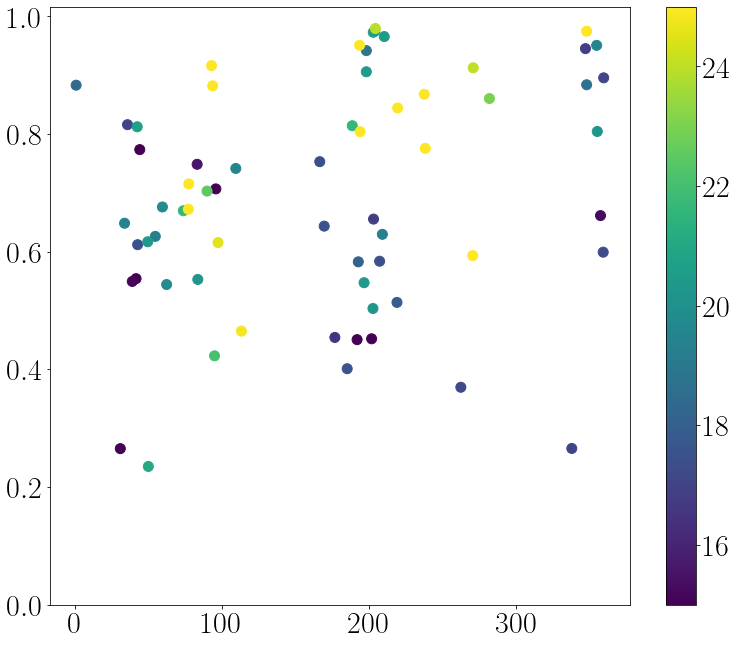

In [46]:
g = plt.scatter(df['PA'],cos_i,c=df['Sep']/cos_i,s=100,vmin=15,vmax=25)
plt.colorbar(g)
plt.ylim(0,None)
plt.show()

we cannot see a obvius correlation between angle, angular separation, real separation and psotion azimutal.

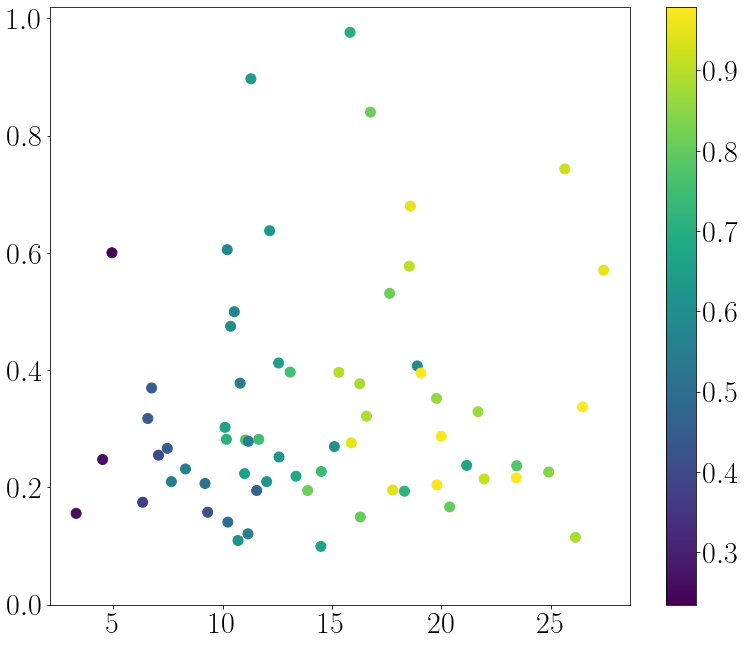

In [47]:
g = plt.scatter(df['Sep'],df['Hshell'],c=cos_i,s=100)
plt.colorbar(g)
plt.ylim(0,None)
plt.show()

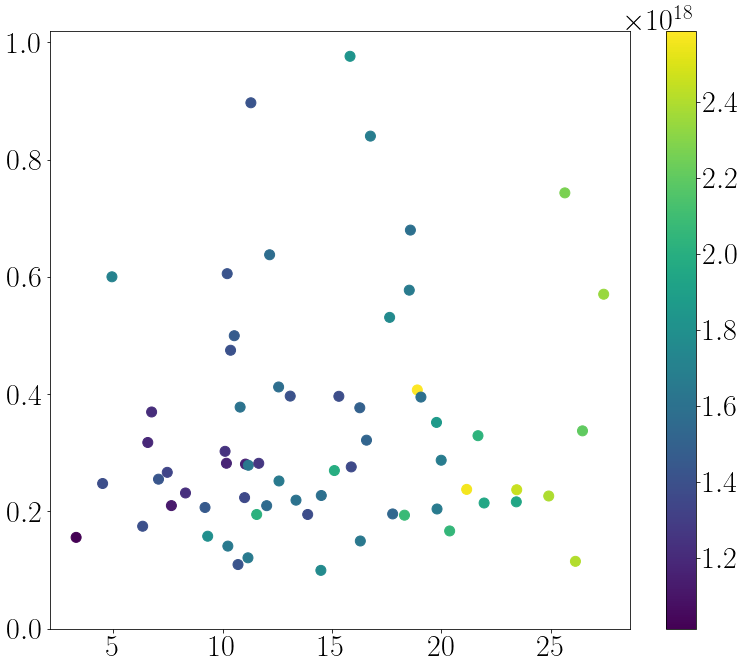

In [48]:
g = plt.scatter(df['Sep'],df['Hshell'],c=Radius_real,s=100)
plt.colorbar(g)
plt.ylim(0,None)
plt.show()

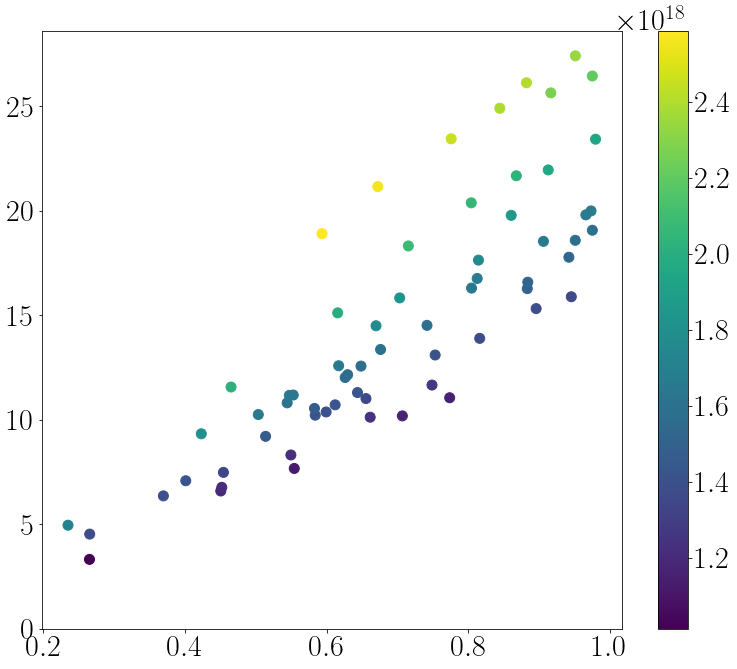

In [49]:
g = plt.scatter(cos_i,df['Sep'],c=Radius_real,s=100)
plt.colorbar(g)
plt.ylim(0,None)
plt.show()

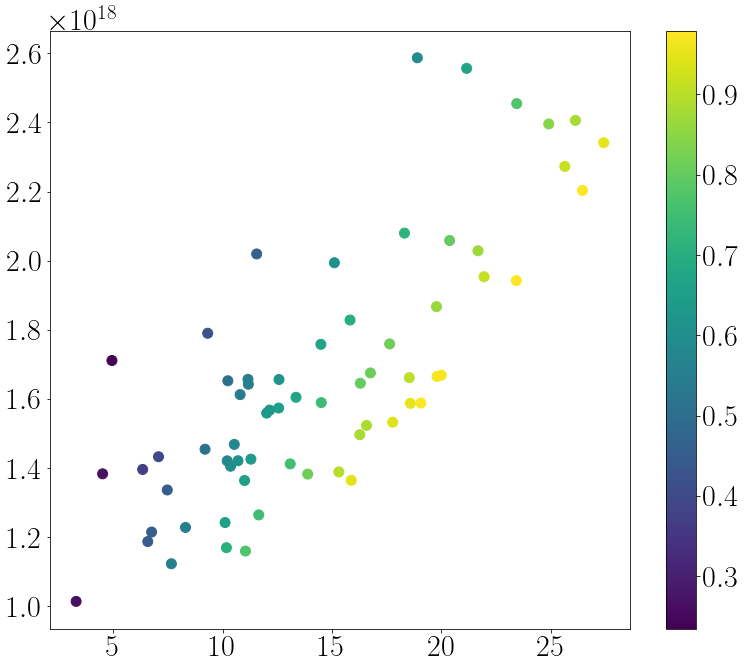

In [50]:
g = plt.scatter(df['Sep'],Radius_real,c=cos_i,s=100)
plt.colorbar(g)
#plt.ylim(0,None)
plt.show()

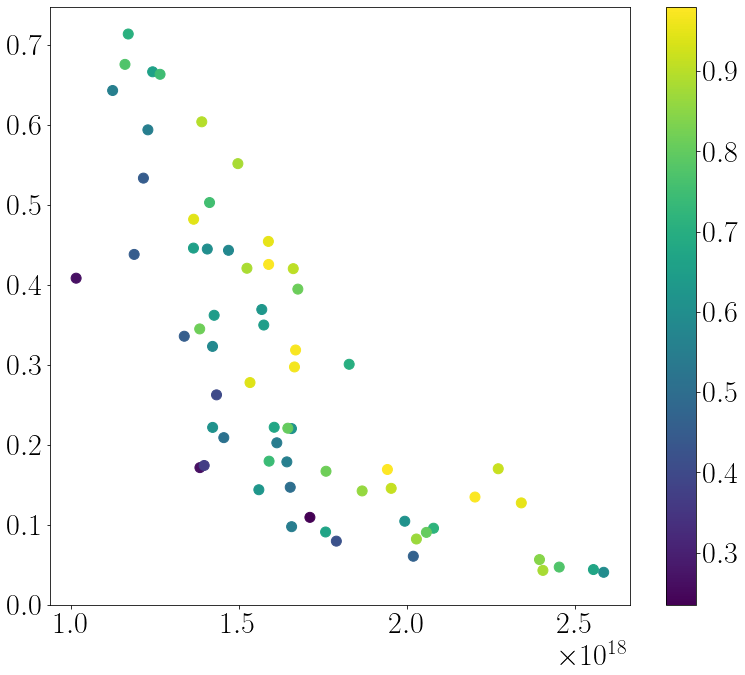

In [51]:
g = plt.scatter(Radius_real,df['Bshell'],c=cos_i,s=100)
plt.colorbar(g)
plt.ylim(0,None)
plt.show()

In [52]:
for j in range(len(Radius_real)):
    print(Radius_real[j],df['Group'][j])

nan null
nan "NE-04"
1.01426112263849e+18 "NE-04"
nan "NE-04"
nan "NE-04"
nan "NE-04"
1.3832927122437865e+18 "NE-04"
1.7111327360352343e+18 "NE-04"
nan "NE-04"
1.395995539456852e+18 "W-08"
1.1872806031016922e+18 "S-07"
1.2148592430035955e+18 "S-07"
nan "W-08"
1.4327360050817324e+18 "S-07"
1.3366165865862592e+18 "S-07"
1.1230736162474871e+18 "E-13"
nan "N-10"
nan "S-07"
1.2281664991848748e+18 "E-13"
nan "S-07"
1.4544416484527496e+18 "S-07"
1.7899435161447165e+18 "E-13"
nan "N-10"
nan "N-10"
nan "W-08"
nan "N-10"
1.2423279984458028e+18 "N-10"
1.1696190366744028e+18 "E-13"
1.4208883860005486e+18 "S-12"
1.6524938510244518e+18 "S-12"
1.4052571364187738e+18 "N-10"
nan "W-08"
1.4684379792168614e+18 "S-12"
1.4211524727754273e+18 "E-13"
1.6124866223216666e+18 "E-13"
nan "S-12"
1.3640405682985997e+18 "S-12"
1.1598836573136942e+18 "E-13"
nan "E-13"
1.6565787836382825e+18 "S-12"
1.64241250749386e+18 "E-13"
1.425685070469669e+18 "S-12"
nan "S-12"
2.0193555463798925e+18 "E-13"
1.2644482102453773e+18

In [53]:
plt.hist(((Radius_real).to(pc),radius),label=('$R$',r'$R\cos(i)$'))
plt.legend()
plt.xlabel('cm')
plt.title('Histogram of globules')

AttributeError: 'Series' object has no attribute 'to'

In [54]:
Radius_real.to('pc')

AttributeError: 'Series' object has no attribute 'to'

In [57]:
F1=Radius_real*u.cm
F1.to('pc')

AttributeError: 'Series' object has no attribute 'to'

In [58]:
F1

0               NaN
1               NaN
2      1.014261e+18
3               NaN
4               NaN
           ...     
164             NaN
165             NaN
166             NaN
167             NaN
168             NaN
Length: 169, dtype: float64

In [61]:
F2= Radius_real*3.24078E-19
F3= radius*3.24078E-19

Text(0.5, 1.0, 'Histogram of globules')

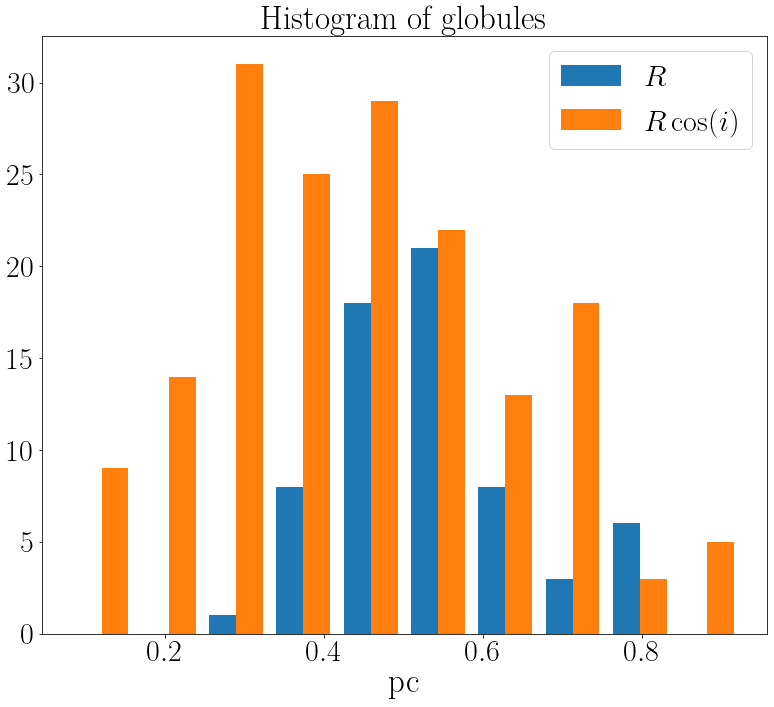

In [63]:
plt.hist((F2,F3),label=('$R$',r'$R\cos(i)$'))
plt.legend()
plt.xlabel('pc')
plt.title('Histogram of globules')